## Problem:
Train MNIST dataset on  logistic regression model

In [ ]:
import pandas as pd
import numpy as np
from keras.datasets import mnist

In [ ]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
# Flatten the images from 28x28 to 784 pixels and normalize
train_X_flat = train_X.reshape(train_X.shape[0], -1) / 255.0
test_X_flat = test_X.reshape(test_X.shape[0], -1) / 255.0

print(f"Shape of flattened training data: {train_X_flat.shape}")
print(f"Shape of flattened testing data: {test_X_flat.shape}")

Shape of flattened training data: (60000, 784)
Shape of flattened testing data: (10000, 784)


Now, let's train a logistic regression model on the preprocessed data.

In [ ]:
# Initialize and train the Logistic Regression model
logistic_model = LogisticRegression(solver='saga', tol=0.1, verbose=1, multi_class='multinomial', max_iter=100)
logistic_model.fit(train_X_flat, train_y)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


convergence after 4 epochs took 10 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.3s finished


LogisticRegression(multi_class='multinomial', solver='saga', tol=0.1, verbose=1)

In [ ]:
LogisticRegression

sklearn.linear_model._logistic.LogisticRegression

After training, I will evaluate the model's accuracy on the test set.

In [ ]:
# Predict on the test set
y_pred = logistic_model.predict(test_X_flat)

# Calculate accuracy
accuracy = accuracy_score(test_y, y_pred)
print(f"Logistic Regression Model Accuracy: {accuracy:.4f}")

Logistic Regression Model Accuracy: 0.9178


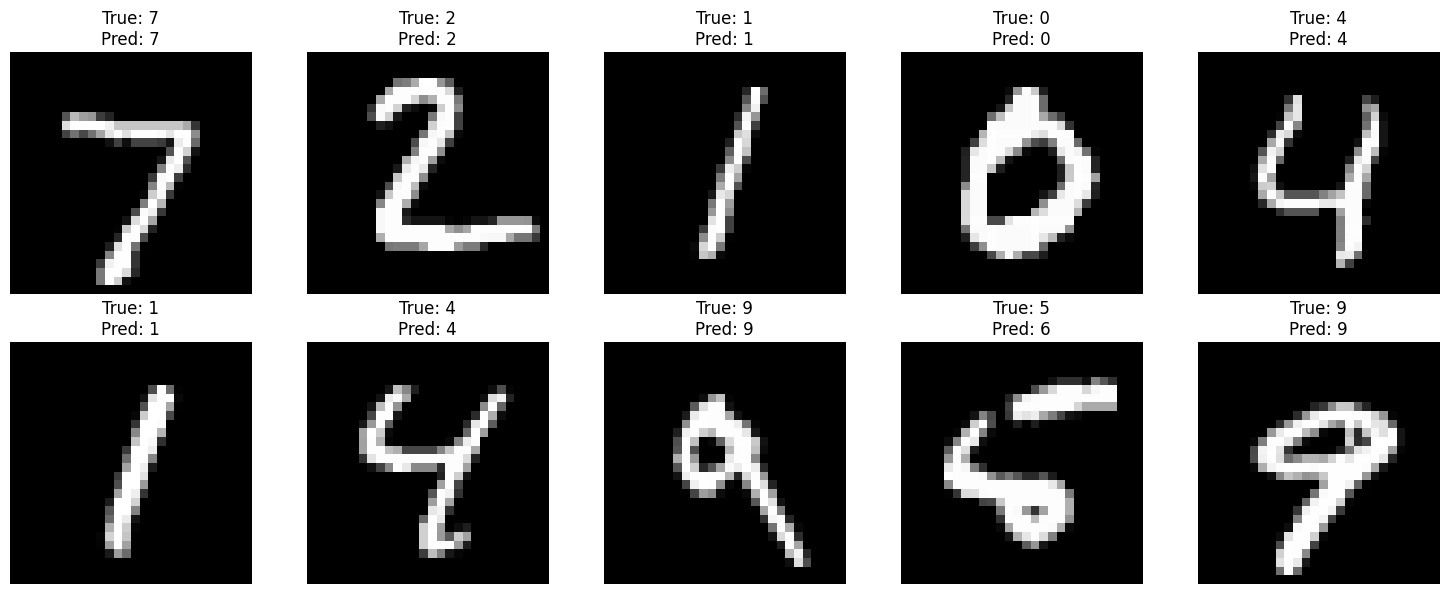

In [ ]:
import matplotlib.pyplot as plt

# Display a few test images with their true and predicted labels
n_samples_to_show = 10

plt.figure(figsize=(15, 6))
for i in range(n_samples_to_show):
    plt.subplot(2, 5, i + 1)  # Grid for displaying images
    plt.imshow(test_X[i], cmap='gray')  # Original 28x28 image
    plt.title(f"True: {test_y[i]}\nPred: {y_pred[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


To demonstrate how the model predicts on a specific 'user input', we can select an image from the test dataset, display it, and then show the model's prediction for that image.

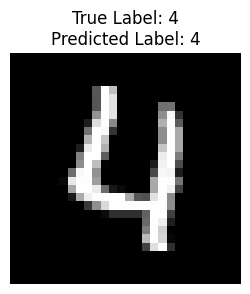

In [ ]:
import matplotlib.pyplot as plt

# You can change this index to any value between 0 and len(test_X) - 1
# to see different examples.
image_index = 5195 # @param {type:"slider", min:0, max:9999, step:1}

# Get the selected image and its true label
single_image = test_X[image_index]
single_true_label = test_y[image_index]

# Reshape the image for prediction (flatten it like we did for training)
single_image_flat = single_image.reshape(1, -1) / 255.0

# Predict the label using the trained model
single_predicted_label = logistic_model.predict(single_image_flat)[0]

# Display the image and its labels
plt.figure(figsize=(3, 3))
plt.imshow(single_image, cmap='gray')
plt.title(f"True Label: {single_true_label}\nPredicted Label: {single_predicted_label}")
plt.axis('off')
plt.show()
